# Looking back: a review

Fall 2022: Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

# Distribution roundup

- *Bernoulli:* $X \in \{0, 1\}$ and $X = 1$ with probability $p$:
    (*flipping coins; random trials*)
    ```
    rng.random() < p
    ```

- *Binomial:* $0 \le X \le n$:
    (*number of sucesses in $n$ independent trials if probaiblity of success is $p$*)
    ```
    rng.binomial(n=n, p=p)
    ```

- *Normal:* $- \infty < X < \infty$, has mean $\mu$ and SD $\sigma$:
    (*sums of many independent things of similar size*)
    ```
    rng.normal(loc=mu, scale=sigma)
    ```
    
- *Poisson:* $X \in \{0, 1, 2, 3, \ldots\}$:
    (*number of rare events*)
    ```
    rng.poisson(lam=mu)
    ```

- *Exponential:* $X \ge 0$, and $\P\{X > x\} = \exp(-\theta x)$:
    (*waiting times, distributions piled up near zero*)
    ```
    rng.exponential(scale=theta)
    ```

- *Gamma:* $X \ge 0$, with $\text{shape}=k$ is the sum of $k$ Exponentials:
    (*waiting times, nonnegative numbers*)
    ```
    rng.gamma(shape=k, scale=theta)
    ```

## On computation


For continuous distributions - probability density function (*pdf*):
```
from scipy.stats import normal
normal.pdf( )
```

For discrete distribution - probability mass function (*pmf*):
```
from scipy.stats import binomial
binomial.pmf( )
```

Either - cumulative distribution function (*cdf*):
```
normal.cdf( )
binomial.cdf( )
```

# Mathematics of probability

Probability can be thought of as relative *area*, and so:

0. *Probabilities are proportions:* $\hspace{2em} 0 \le \P\{A\} \le 1$

1. *Everything:* $\hspace{2em} \P\{ \Omega \} = 1$

2. *Complements:* $\hspace{2em} \P\{ \text{not } A\} = 1 - \P\{A\}$

3. *Disjoint events:* If $\hspace{2em} \P\{A \text{ and } B\} = 0$
    then $\hspace{2em} \P\{A \text{ or } B\} = \P\{A\} + \P\{B\}$.

4. *Independence:* $A$ and $B$ are independent iff $\P\{A \text{ and } B\} = \P\{A\} \P\{B\}$.

5. *Conditional probability:* 
    $$\P\{A \;|\; B\} = \frac{\P\{A \text{ and } B\}}{ \P\{B\} }$$

## Bayes' rule

A consequence is that

$$\P\{B \;|\; A\} = \frac{\P\{B\} \P\{A \;|\; B\}}{ \P\{A\} } .$$

## Random variables

The *mean* of $X$ is
$$ \E[X] = \sum_x x \P\{X = x\}, $$
or, if $X$ has *probability density* $f_X(x)$,
$$ \E[X] = \int x f_X(x) dx . $$

The *variance* of $X$ is $\sd[X]^2$ and
$$ \var[X] = \E[X^2] - \E[X]^2 .$$

It is *always* true that
$$ \E[X + Y] = \E[X] + \E[Y] .$$

If $X$ and $Y$ are *independent* then
$$ \var[X + Y] = \var[X] + \var[Y] . $$

## Poisson limits

If we have a large number of almost independent trials,
then

- the total number of successes is Poisson, and
- the time$^*$ between successes is Exponential.

$^*$ *measured in suitable units*

## Central limits

If $X_1, \ldots, X_n$ are independent
with mean $\mu$ and SD $\sigma$
then
$$  \frac{1}{n} \left( X_1 + \cdots + X_n \right) \approx \text{Normal}(\mu, \sigma/\sqrt{n}) . $$

## Facts about Normals

1. If $a$ and $b$ are numbers and $X \sim \text{Normal}(\mu, \sigma)$
    then
    $$ aX + b \sim \text{Normal}(a \mu + b, a\sigma) . $$

2. If $X \sim \text{Normal}(\mu_X, \sigma_X)$ and $Y \sim \text{Normal}(\mu_Y, \sigma_Y)$
    are independent then
    $$ X + Y \sim \text{Normal}(\mu_X + \mu_Y, \sqrt{\sigma_X^2 + \sigma_Y^2}) . $$

## $t$ statistics

Also thanks to the Central Limit Theorem,
if 

- $X_1, \ldots, X_n$ are a bunch of independent samples from some distribution with mean $\mu$,
- $\bar X$ is the sample mean, and
- $S$ is the sample standard deviation,

then the difference between the sample mean and $\mu$, in units of $S$:
$$  T = \frac{\bar X - \mu}{S/\sqrt{n}}  $$
has, approximately$^*$, [Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
with $n-2$ degrees of freedom.

# Concepts

## Method of moments

To fit a distribution to data with the method of moments,

1. Pick a particular form of the distribution.
2. Choose parameter values for the distribution so that the "moments" (e.g., the mean) match.

## Maximum likelihood

To fit a model by *maximum likelihood*:

1. formulate a generative model that seems likely to fit the data
    with some free parameters
    that describe what we want to know about,
2. write down the *likelihood* (i.e., probability) of generating *our actual data*
    as a function of the parameter(s), and
3. choose the parameter values the make the data look most probable.

## The $p$-value

is

> the probability of seeing a result
> at least as surprising as what we observed in the data,
> if the null hypothesis is true.

The parts of this are:

- *the probability ... if the null hypothesis is true*:
    we need a concrete model we can compute probabilities with

- *a result*: a statistic summarizing how strongly our data suggest that model is *not* right

- *at least as surprising*: usually, the statistic is chosen so that larger values are more surprising

## Confidence intervals

A 95% confidence interval for the sample mean is
$$ \text{from}\quad \bar x - t_* s / \sqrt{n} \quad \text{to} \quad \bar x + t_* s / \sqrt{n}, $$
where $\P\{t < t_*\} = 0.975$.

Across many such confidence intervals constructed on many datasets of independent samples,
the true mean will fall within the confidence interval 95% of the time.

# A simulation problem

Let's say we make a random number as follows:
shuffle a deck of cards and draw the first card,
and add the number on the card to your total.
(A=1, J=11, Q=12, and K=13)
Draw another card: if it is the same suit as the first, add it to your total.
Continue until you get a card of a different suit.

1. Write a function to simulate from this
    and use it to make a histogram of the distribution.

2. What is the largest possible value?
    What is the probability of getting this largest value?

In [30]:


def sim_cards():
    deck = [
        (num, suit)
        for num in range(1, 14)
        for suit in np.arange(4)
    ]
    # shuffle the deck
    deck = rng.choice(deck, replace=False, size=52)
    j = 0
    card = deck[j]
    total = card[0]
    # print(f"First card: {card}; total: {total}")
    while j < 52:
        next_card = deck[j+1]
        # print(f"Next card: {next_card}; total: {total}")
        if next_card[1] != card[1]:
            break
        else:
            total += next_card[0]
        j += 1
    return total

sim_cards()

10

(array([6.000e+02, 1.158e+03, 1.225e+03, 1.334e+03, 1.373e+03, 1.415e+03,
        1.435e+03, 3.060e+02, 2.720e+02, 2.440e+02, 2.090e+02, 1.520e+02,
        9.500e+01, 5.800e+01, 3.700e+01, 3.000e+01, 1.800e+01, 1.600e+01,
        7.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58.]),
 <BarContainer object of 29 artists>)

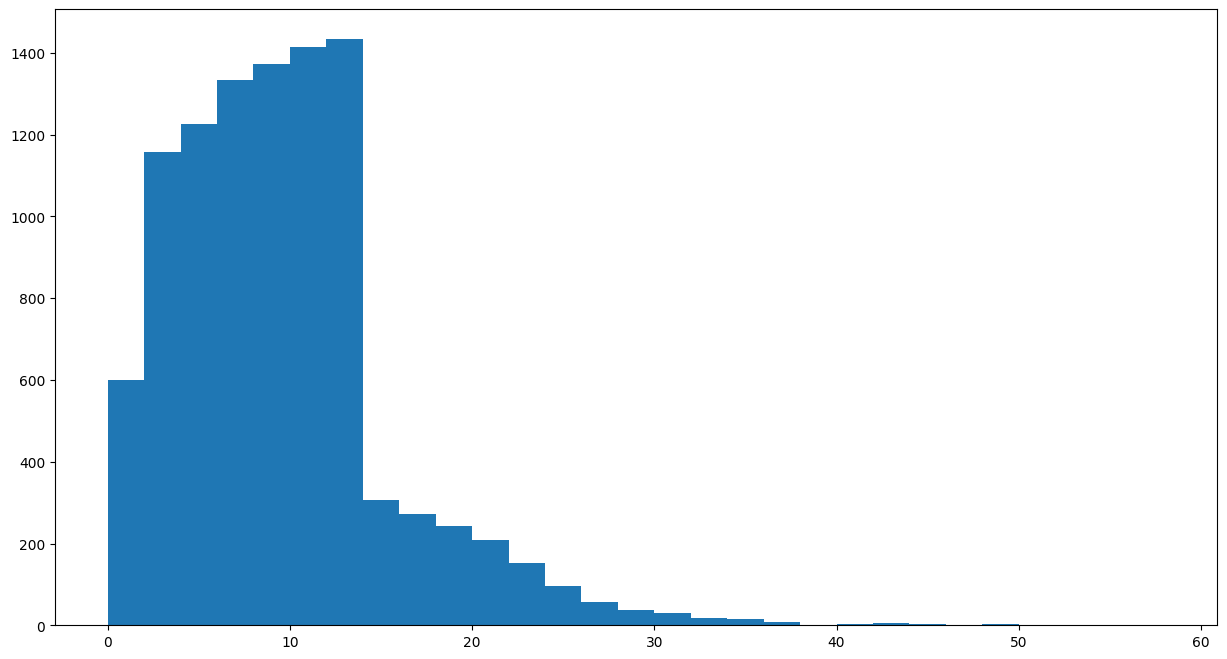

In [33]:
values = [sim_cards() for _ in range(10000)]
from dsci345 import pretty

plt.hist(values, bins=pretty(values, 40));

The largest possible value is 91,
and the chance of getting this value is
$$
   \frac{12}{51} \times \frac{11}{50} \times \cdots \frac{1}{40}
   \approx 2.12 \times 10^{-10}
$$

# A new distribution

Suppose we have a coin that comes up heads with probability $p$
(and tails with probability $1-p$).
Let $X$ be the number of times we have to flip the coin until the $k$-th heads.
Then, $X$ has the *negative binomial* distribution.

1. Write a function to simulate from this distribution
    following this description.

2. Check your function by simulating at least 10,000 random draws
    with $k=3$ and $p=0.3$,
    and making a table comparing the observed and expected proportions of these draws that are $n$
    for each $0 \le n \le 20$.

# Tips

The amount of money a barista gets in tips each day has a mean \\$52 and an SD of \\$15.
Over 8 weeks of 5-day work weeks,
what is the mean and SD of the total amount of tips will they have got?
Assuming the tips each day are independent,
estimate the probability that the total amount of tips exceeds \\$2,300.

The mean amount of tips is
$ 40 \times \$52 = \$2,080.$
and the variance is
$ 40 \times 15^2 = 9000$,
so the standard deviation is
$ \sqrt{9000} = \$94.86$.


Since we're adding up lots of independent things
(the "things" are the amount of tips in each day)
we can use the normal approximation, so:

In [65]:
from scipy.stats import norm
1 - norm.cdf(2300, loc=2080, scale=94.86)

0.010191900701979173

## Fitting an exponential

Suppose that we have 20 independent observations:
```
2.51, 44.16,  6.1 , 42.4,  3.49,  1.62, 25.37, 50.58, 41.11, 15.25,
6.64,  6.54, 14.64,  7.33,  7.11, 61.53, 7.26, 13.34,  1.88, 10.67
```
Make up a story that could have produced these numbers,
and then use maximum likelihood to fit an Exponential distribution to these data.

(array([10.,  2.,  2.,  1.,  0.,  0.,  2.,  1.,  1.,  1.]),
 array([ 1.62 ,  7.611, 13.602, 19.593, 25.584, 31.575, 37.566, 43.557,
        49.548, 55.539, 61.53 ]),
 <BarContainer object of 10 artists>)

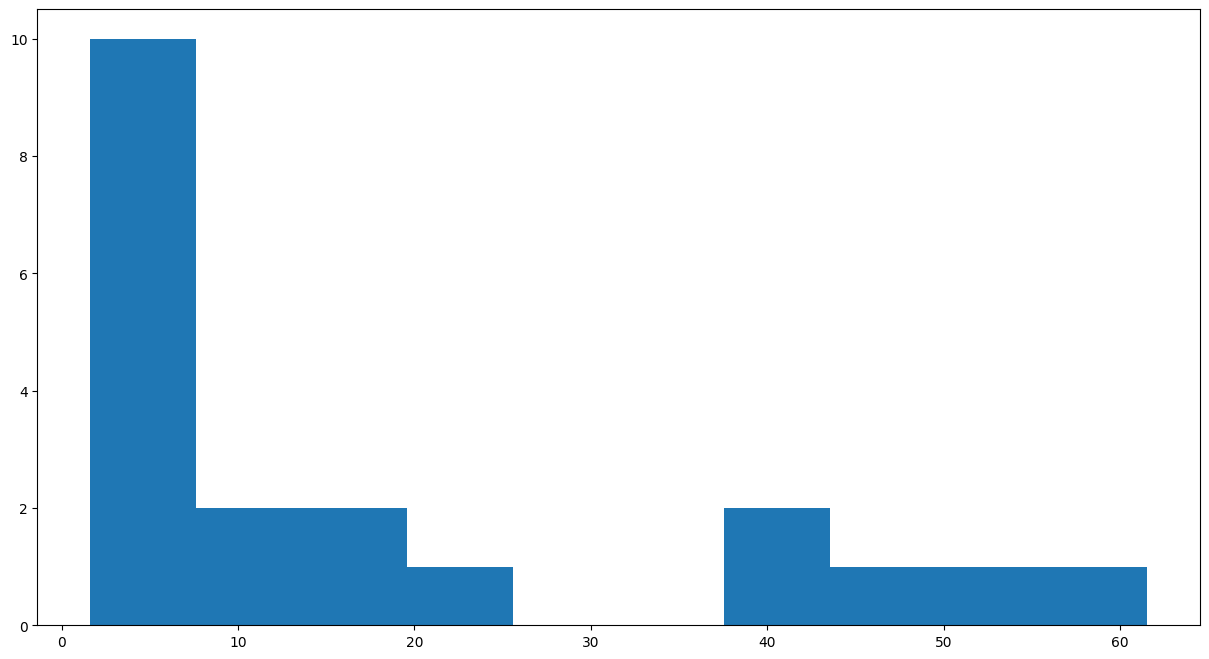

In [46]:
x = [2.51, 44.16,  6.1 , 42.4,  3.49,  1.62, 25.37, 50.58, 41.11, 15.25,
    6.64,  6.54, 14.64,  7.33,  7.11, 61.53, 7.26, 13.34,  1.88, 10.67]
plt.hist(x)

In [56]:
# 1. write a log-likelihood function
from scipy.stats import expon

def log_likelihood(scale):
    return np.sum(expon.logpdf(x, scale=scale))

In [57]:
log_likelihood(3)

-145.14891244002885

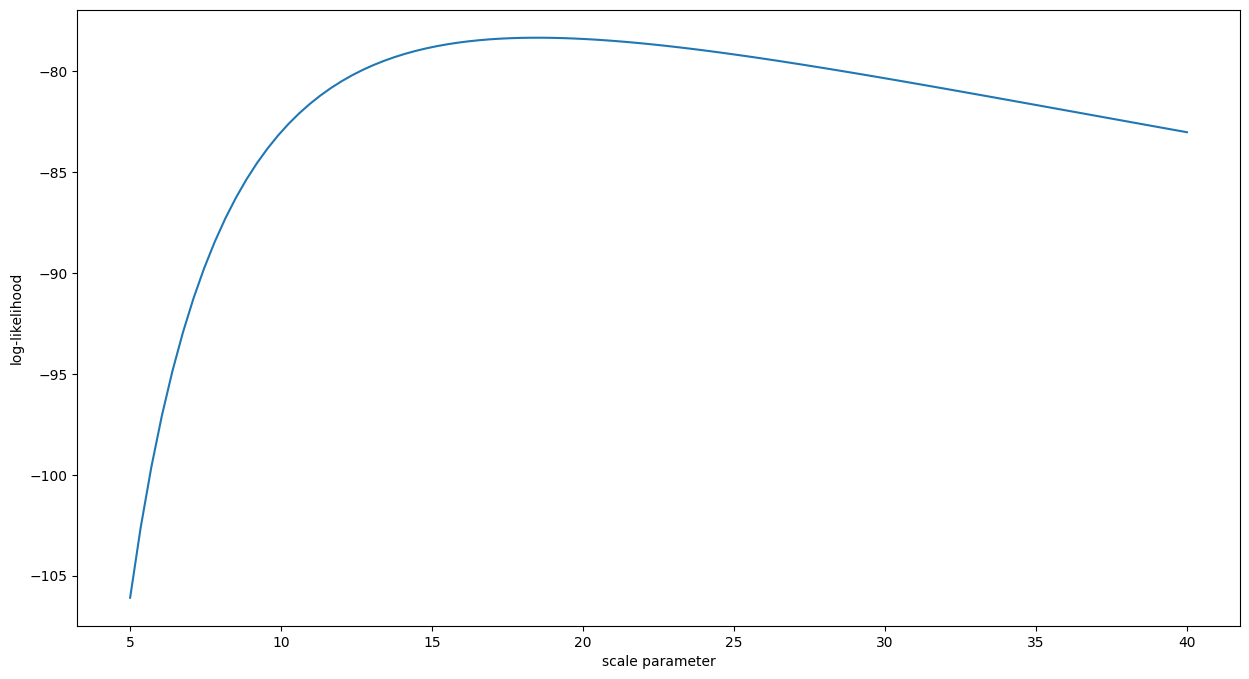

In [59]:
xvals = np.linspace(5, 40, 101)
lvals = [log_likelihood(a) for a in xvals]
plt.plot(xvals, lvals)
plt.xlabel("scale parameter")
plt.ylabel("log-likelihood");

In [61]:
import scipy

def f(scale):
    return -1 * log_likelihood(scale)

scipy.optimize.minimize(
    f,
    10
)

      fun: 78.32999308675163
 hess_inv: array([[16.95651328]])
      jac: array([-9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([18.47647761])

The maximum likelihood estimate for the scale parameter on the Exponential
is 18.5.

# The beta distribution: introduction

In [39]:
rng.beta(a=0.5, b=0.5,size=10)

array([0.70247288, 0.06706727, 0.98810507, 0.32376168, 0.35145546,
       0.13162128, 0.30439685, 0.36214   , 0.99997619, 0.75311264])

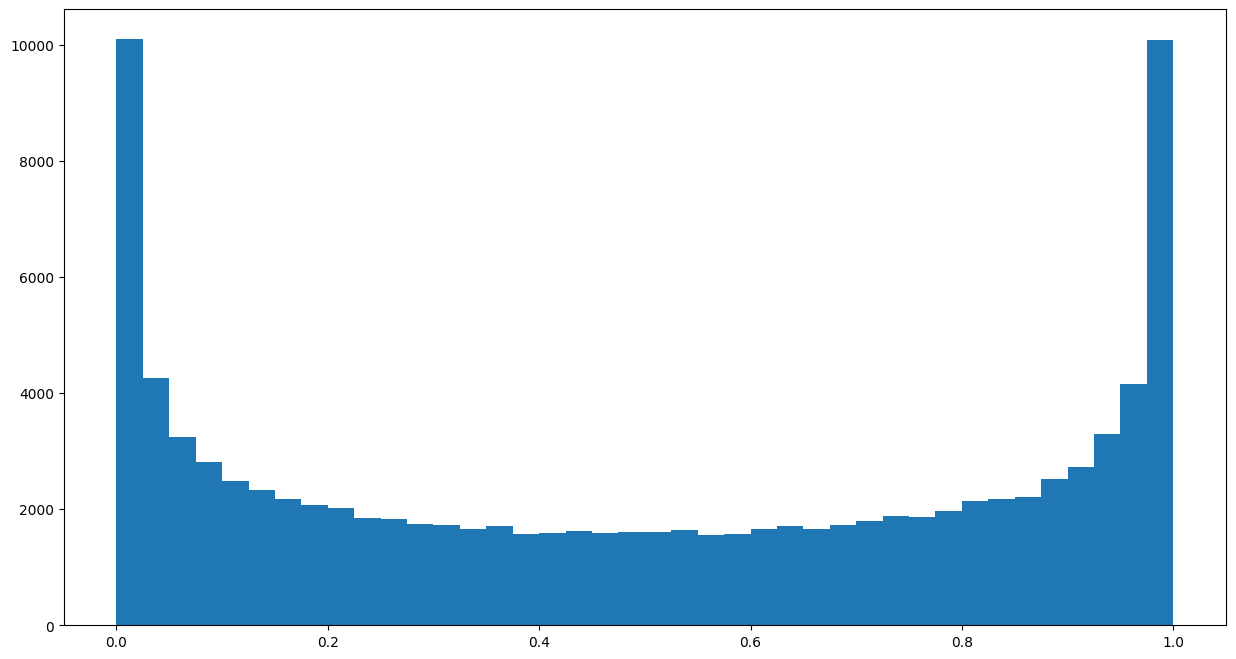

In [41]:
x = rng.beta(a=0.5, b=0.5,size=100000)
plt.hist(x, bins=40);

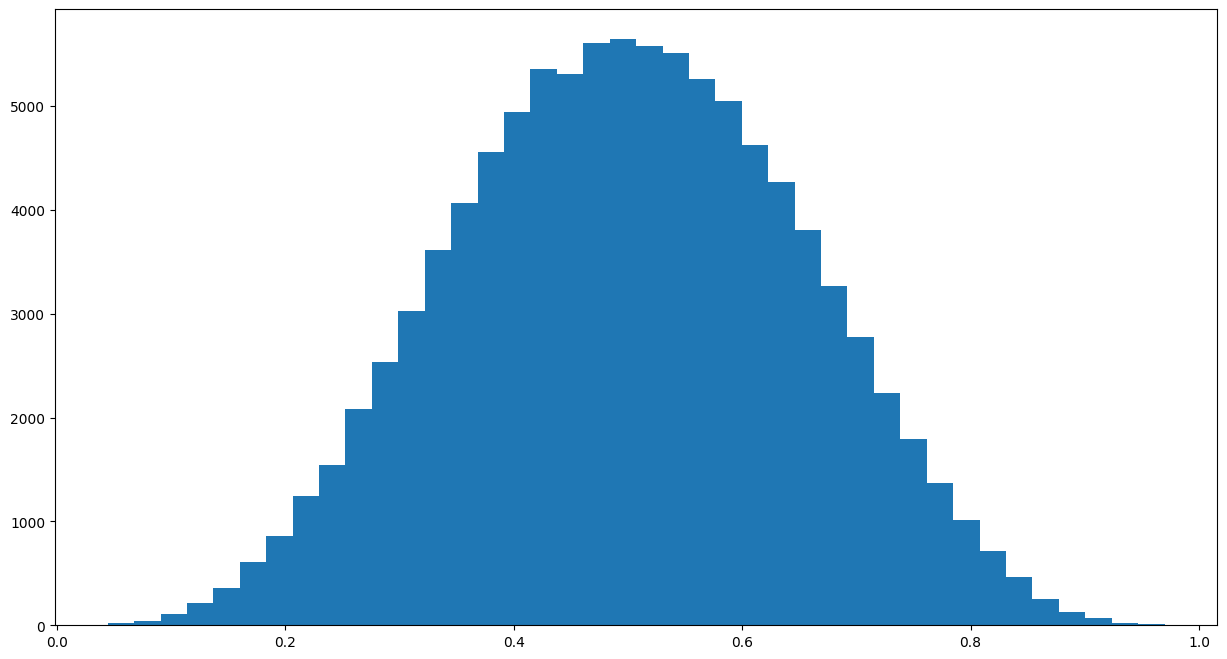

In [42]:
x = rng.beta(a=5, b=5,size=100000)
plt.hist(x, bins=40);

Text(0, 0.5, 'density of a Beta distribution')

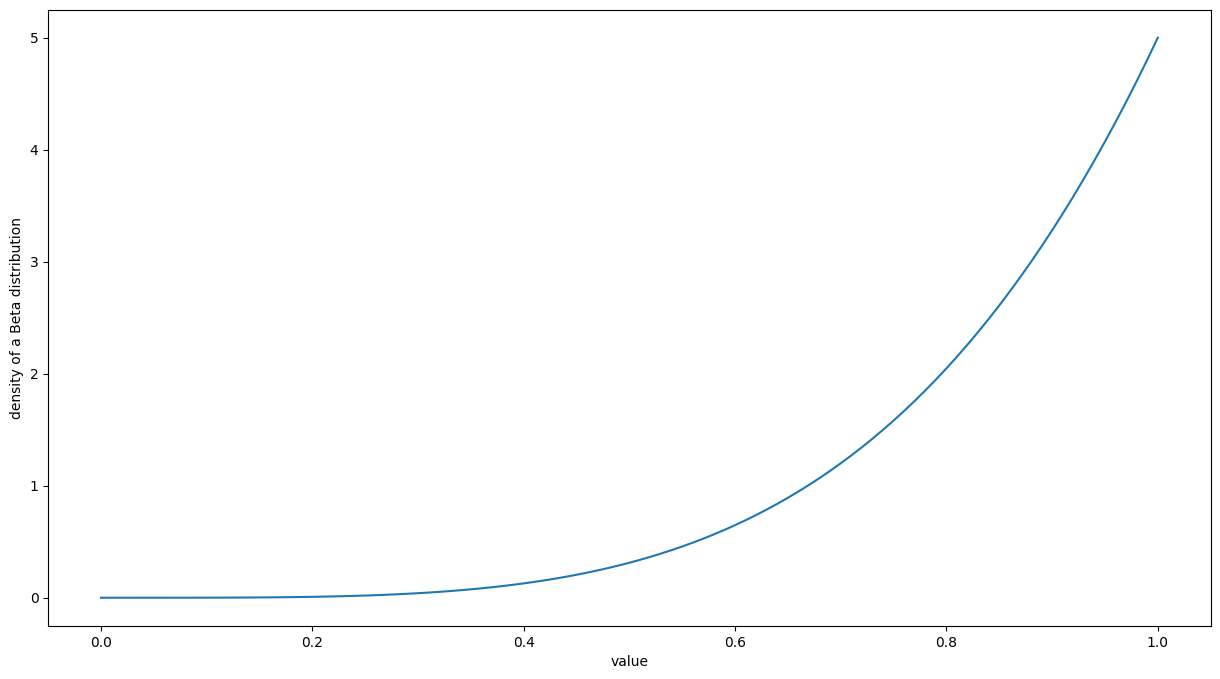

In [45]:
from scipy.stats import beta
xvals = np.linspace(0, 1, 101)
fx = [beta.pdf(x, a=5, b=1) for x in xvals]

plt.plot(xvals, fx);
plt.xlabel("value")
plt.ylabel("density of a Beta distribution");

In [38]:
help(rng.beta)

Help on built-in function beta:

beta(...) method of numpy.random._generator.Generator instance
    beta(a, b, size=None)
    
    Draw samples from a Beta distribution.
    
    The Beta distribution is a special case of the Dirichlet distribution,
    and is related to the Gamma distribution.  It has the probability
    distribution function
    
    .. math:: f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                     (1 - x)^{\beta - 1},
    
    where the normalization, B, is the beta function,
    
    .. math:: B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}
                                 (1 - t)^{\beta - 1} dt.
    
    It is often seen in Bayesian inference and order statistics.
    
    Parameters
    ----------
    a : float or array_like of floats
        Alpha, positive (>0).
    b : float or array_like of floats
        Beta, positive (>0).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e